In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import random
import numpy as np
import ray
from ray.rllib.agents import ppo, a3c, dqn, sac
import torch

from mdps.cattle import cMDPCattle
from utils.distributions import ConstantDistribution, ParticleDistribution, UniformDistribution

In [2]:
def get_rollouts(solver_, config):
    """Generate rollouts from a given solver and MDP(c)"""
    env_ = cMDPCattle(config=config)
    done_ = False
    obs_ = env_.reset()
    # run until episode ends
    gt_obs_arr_ = obs_
    gt_act_arr_ = None
    gt_rew_arr_ = None
    while not done_:
        action_ = solver_.compute_single_action(obs_)
        obs_, rewawrd_, done_, _ = env_.step(action_)
        gt_obs_arr_ = np.vstack((gt_obs_arr_, obs_))
        if gt_act_arr_ is None:
            gt_act_arr_ = [action_]
            gt_rew_arr_ = [rewawrd_]
        else:
            gt_act_arr_ += [action_]
            gt_rew_arr_ += [rewawrd_]

    gt_act_arr_ = np.array(gt_act_arr_)
    gt_rew_arr_ = np.array(gt_rew_arr_)
    return gt_obs_arr_[1:,:], gt_act_arr_, gt_rew_arr_

def plot_rollouts(gt_obs_arr_, gt_act_arr_):
    """Plot generated rollouts"""
    fig_, ax_1 = plt.subplots()
    fig_.set_size_inches(10, 6, forward=True)

    x = np.arange(start=0, stop=gt_obs_arr_.shape[0])
    ax_2 = ax_1.twinx()
    ax_1.plot(x, gt_obs_arr_[:,2], 'r-')
    ax_2.plot(x, gt_act_arr_, 'b-', alpha=0.3)

    ax_1.set_xlabel('time step')
    ax_1.set_ylabel('Breeding Stock(x)', color='r')
    ax_2.set_ylabel('Action', color='b')
    plt.title('sample observations and actions')
    plt.show()

In [3]:
c = {"context_distribution":
        ConstantDistribution(dim=10, constant_vector=np.array([1.0, 1.4, 0.95, 0.93, 0.7, .53, .40, 1E-8, 3.7, 6.3]))
    }

In [4]:
'''
np.random.seed(1111)
random.seed(1111)
torch.manual_seed(1111)
'''
ray.shutdown()
ray.init()

expert = ppo.PPOTrainer(env=cMDPCattle, config={
    "env_config": c,
    "framework": "torch",  # config to pass to env class
})

rews = []
for eps in range(50):
    res = expert.train()
    if eps % 5 == 0:
        print(eps, res['episode_reward_mean'])
    rews += [res['episode_reward_mean']]

2022-04-12 23:04:35,327	INFO ppo.py:166 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2022-04-12 23:04:35,327	INFO trainer.py:743 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-04-12 23:04:37,555	WARNING util.py:57 -- Install gputil for GPU system monitoring.
2022-04-12 23:04:47,702	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 57633023629736.0x the scale of `vf_clip_param`. This means that it will take more than 57633023629736.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.


0 -576330236297359.5


2022-04-12 23:04:57,779	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 28819551400821.0x the scale of `vf_clip_param`. This means that it will take more than 28819551400821.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:05:07,825	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 19213082320572.0x the scale of `vf_clip_param`. This means that it will take more than 19213082320572.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:05:17,950	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 14409812067775.0x the scale of `vf_clip_param`. This means that it will take more than 14409812067775.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:05:28,215	WARNING ppo.py:245 -- The ma

5 -103275798964668.94


2022-04-12 23:05:47,981	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1092722207.0x the scale of `vf_clip_param`. This means that it will take more than 1092722207.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:05:57,963	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 4730145.0x the scale of `vf_clip_param`. This means that it will take more than 4730145.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:06:07,923	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 1063381.0x the scale of `vf_clip_param`. This means that it will take more than 1063381.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:06:17,878	WARNING ppo.py:245 -- The magnitude of your environment rewards 

10 -5333006.866326735


2022-04-12 23:06:40,065	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 447410.0x the scale of `vf_clip_param`. This means that it will take more than 447410.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:06:51,443	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 309139.0x the scale of `vf_clip_param`. This means that it will take more than 309139.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:07:02,536	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 270095.0x the scale of `vf_clip_param`. This means that it will take more than 270095.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:07:12,437	WARNING ppo.py:245 -- The magnitude of your environment rewards are more tha

15 -539784.3003491514


2022-04-12 23:07:32,640	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 141136.0x the scale of `vf_clip_param`. This means that it will take more than 141136.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:07:42,472	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 180158.0x the scale of `vf_clip_param`. This means that it will take more than 180158.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:07:52,377	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 145047.0x the scale of `vf_clip_param`. This means that it will take more than 145047.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:08:02,276	WARNING ppo.py:245 -- The magnitude of your environment rewards are more tha

20 -2179596.2415415384


2022-04-12 23:08:21,986	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 178111.0x the scale of `vf_clip_param`. This means that it will take more than 178111.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:08:31,796	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 189896.0x the scale of `vf_clip_param`. This means that it will take more than 189896.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:08:41,683	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 151242.0x the scale of `vf_clip_param`. This means that it will take more than 151242.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:08:51,510	WARNING ppo.py:245 -- The magnitude of your environment rewards are more tha

25 -1063816.169185149


2022-04-12 23:09:11,209	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 86108.0x the scale of `vf_clip_param`. This means that it will take more than 86108.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:09:21,091	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 77885.0x the scale of `vf_clip_param`. This means that it will take more than 77885.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:09:30,914	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 54713.0x the scale of `vf_clip_param`. This means that it will take more than 54713.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:09:40,726	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 8124

30 -522509.64356458926


2022-04-12 23:10:00,488	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 44406.0x the scale of `vf_clip_param`. This means that it will take more than 44406.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:10:10,276	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 48838.0x the scale of `vf_clip_param`. This means that it will take more than 48838.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:10:20,122	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 42332.0x the scale of `vf_clip_param`. This means that it will take more than 42332.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:10:30,030	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 5558

35 -667733.6810171216


2022-04-12 23:10:49,746	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 70356.0x the scale of `vf_clip_param`. This means that it will take more than 70356.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:10:59,794	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 65017.0x the scale of `vf_clip_param`. This means that it will take more than 65017.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:11:09,728	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 77971.0x the scale of `vf_clip_param`. This means that it will take more than 77971.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:11:19,639	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 6510

40 -573631.428331556


2022-04-12 23:11:39,465	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 51221.0x the scale of `vf_clip_param`. This means that it will take more than 51221.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:11:49,396	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 41291.0x the scale of `vf_clip_param`. This means that it will take more than 41291.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:11:59,260	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 25270.0x the scale of `vf_clip_param`. This means that it will take more than 25270.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:12:09,143	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 2727

45 -297257.06118832005


2022-04-12 23:12:28,955	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 16640.0x the scale of `vf_clip_param`. This means that it will take more than 16640.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:12:38,898	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 10744.0x the scale of `vf_clip_param`. This means that it will take more than 10744.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:12:48,885	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 24903.0x the scale of `vf_clip_param`. This means that it will take more than 24903.0 iterations for your value function to converge. If this is not intended, consider increasing `vf_clip_param`.
2022-04-12 23:12:58,799	WARNING ppo.py:245 -- The magnitude of your environment rewards are more than 2291

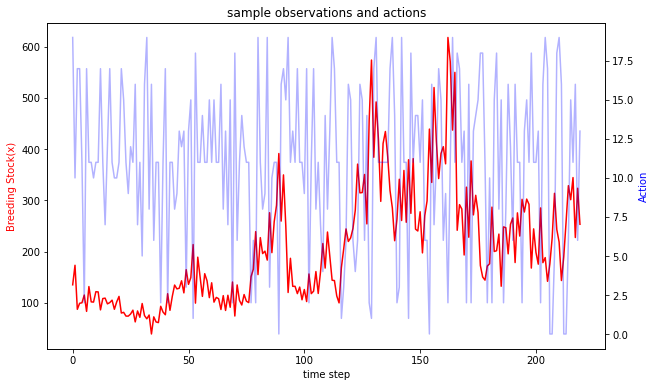

In [30]:
gt_obs_arr, gt_act_arr, gt_rew_arr = get_rollouts(expert, config=c)
plot_rollouts(gt_obs_arr, gt_act_arr)

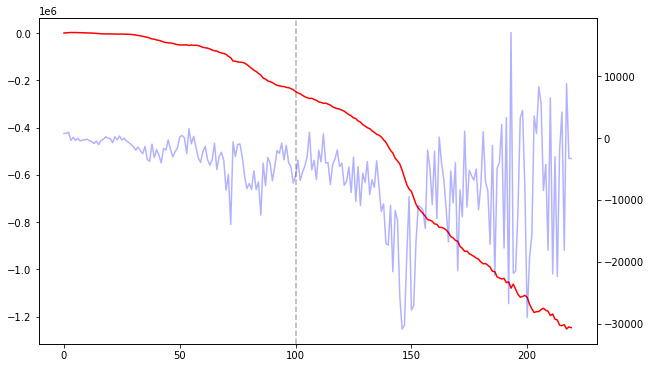

In [14]:
rew = np.zeros(gt_rew_arr.shape[0])
for i in range(rew.shape[0]):
    rew[i] = sum(gt_rew_arr[:i])

fig, ax_1 = plt.subplots()
fig.set_size_inches(10, 6, forward=True)

x = np.arange(start=0, stop=gt_rew_arr.shape[0])
ax_2 = ax_1.twinx()
ax_1.plot(x, rew, 'r-')
ax_2.plot(x, gt_rew_arr, 'b-', alpha=0.3)
plt.axvline(x=100, alpha=0.3, color='black', linestyle='--')

In [67]:
ray.shutdown()
ray.init()

expert_null = ppo.PPOTrainer(env=cMDPCattle, config={
    "env_config": c,
    "framework": "torch",  # config to pass to env class
})

2022-04-11 22:50:54,458	WARNING util.py:57 -- Install gputil for GPU system monitoring.


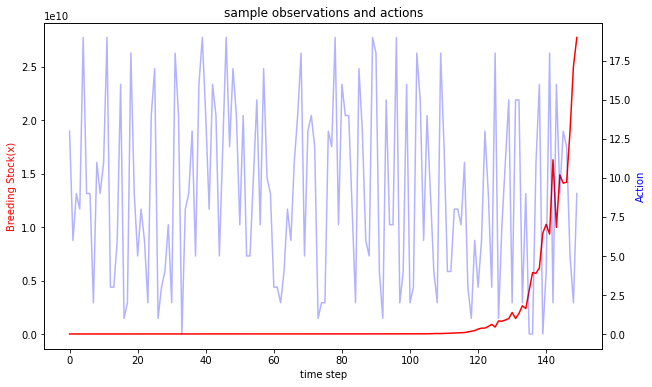

In [72]:
gt_obs_arr, gt_act_arr, gt_rew_arr = get_rollouts(expert_null, config=c)
plot_rollouts(gt_obs_arr, gt_act_arr)

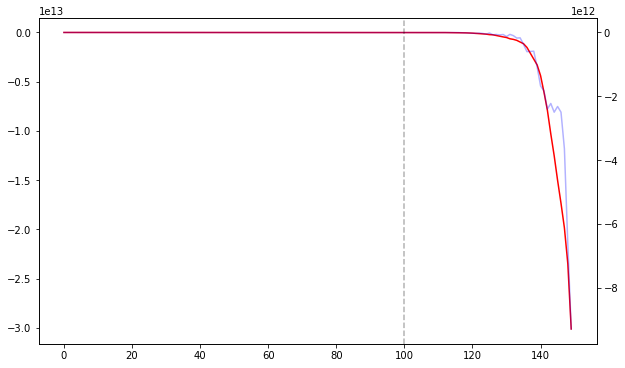

In [73]:
rew = np.zeros(gt_rew_arr.shape[0])
for i in range(rew.shape[0]):
    rew[i] = sum(gt_rew_arr[:i])

fig, ax_1 = plt.subplots()
fig.set_size_inches(10, 6, forward=True)

x = np.arange(start=0, stop=gt_rew_arr.shape[0])
ax_2 = ax_1.twinx()
ax_1.plot(x, rew, 'r-')
ax_2.plot(x, gt_rew_arr, 'b-', alpha=0.3)
plt.axvline(x=100, alpha=0.3, color='black', linestyle='--')

In [ ]:
p = np.zeros(100)
p[0] = 500
m = np.zeros(100)
m[0] = 350
h = np.zeros(100)
h[0] = 50
for i in range(100-1):
    p[i+1] = p[i] + 25 + np.random.normal(0, 4, 1)[0]
    m[i+1] = m[i] + 0.3*63 + np.random.normal(0, 4, 1)[0]
    h[i+1] = h[i] + 0.07*37 + np.random.normal(0, 5.3, 1)[0]

fig, ax = plt.subplots()
fig.set_size_inches(10, 6, forward=True)

x = np.arange(start=0, stop=100)
ax.plot(x, p, 'r-')
ax.plot(x, m, 'b-', alpha=0.3)
ax.plot(x, h, 'g-')
ax.plot(x, p-m-2.2*h, 'y-')
ax.axhline(y=0.0, alpha=0.3, color='black', linestyle='--')
